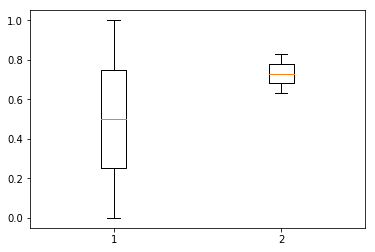

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
%matplotlib inline

tmp = np.loadtxt("dataset.csv", dtype=np.str, delimiter=",")
data = tmp[1:,1:].astype(np.float)#讀取數據

df = pd.DataFrame(data[0:,:7]) #將前7個欄位做一次分群

#print(df)

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2)  # 分X群
kmeans.fit(df)
y_pred = kmeans.fit_predict(df)  # 將群分類

#print(y_pred)

df = pd.DataFrame({'x':y_pred,'y':data[0:,7]})#在和錄取率做分群
y_pred = kmeans.fit_predict(df)  # 將群分類
centroids = kmeans.cluster_centers_  # 各群中心點(X,Y)的位置

#print(y_pred)

#盒鬚圖
plt.boxplot(centroids)
plt.show()

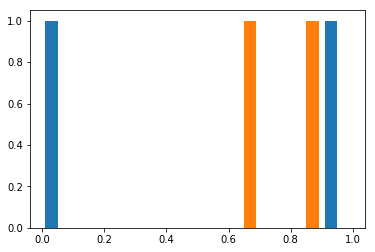

In [9]:
#長條圖
plt.hist(centroids)
plt.savefig(fname = "test.png", format = "png")

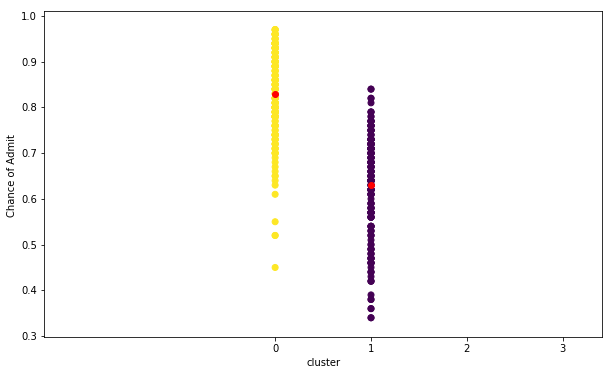

In [12]:
#點圖
plt.figure(figsize=(10, 6))
plt.ylabel('Chance of Admit ')
plt.xlabel('cluster')
plt.xticks(range(len(y_pred)))#設定為整數
plt.scatter(df['x'],df['y'], c=y_pred) #C是第三維度 顏色做維度
plt.scatter(centroids[:, 0], centroids[:, 1],c='red') #標群心
plt.show()